In [1]:
import sys

sys.path.insert(0, '..')
import os
from biosimulator_processes.process_bigraph import pp, pf
from biosimulator_processes.data_model import *
from biosimulator_processes.data_model import MODEL_TYPE, BaseModel
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder
from biosimulator_processes.builder.builder_api import test_data_model 
from biosimulator_processes.processes.copasi_process import CopasiProcess
from biosimulator_processes.process_bigraph.experiments.minimal_gillespie import EXPORT
from biosimulator_processes.process_bigraph import ProcessTypes
from biosimulator_processes.builder.builder_api import Builder 
from biosimulator_processes.bigraph_schema.registry import map_type_to_pydantic

model_filepath = '../biosimulator_processes/model_files/Caravagna2010.xml'

os.path.exists(model_filepath)

CobraProcess registered successfully.
CopasiProcess registered successfully.
TelluriumProcess registered successfully.
DeterministicTimeCourseParameterScan registered successfully.


True

In [2]:
copasi_process_model = TimeCourseModel(
    model_source=model_filepath,
    model_changes=TimeCourseModelChanges(
        species_changes=[SpeciesChanges(name='T', initial_concentration=0.0024), SpeciesChanges(name='E', initial_concentration=0.23)]
    )
)

In [3]:
copasi_process_model

TimeCourseModel(model_id=None, model_source=ModelFilepath(value='../biosimulator_processes/model_files/Caravagna2010.xml'), model_language='sbml', model_name='Unnamed Composite Process TimeCourseModel', model_changes=TimeCourseModelChanges(species_changes=[SpeciesChanges(name='T', unit=None, initial_concentration=0.0024, initial_particle_number=None, initial_expression=None, expression=None), SpeciesChanges(name='E', unit=None, initial_concentration=0.23, initial_particle_number=None, initial_expression=None, expression=None)], global_parameter_changes=[], reaction_changes=[]), model_units='_default')

In [4]:
copasi_process_config = TimeCourseProcessConfig(model=copasi_process_model)

In [5]:
copasi_process = CopasiProcess(config=copasi_process_config.model_dump())

In [11]:
r = copasi_process.update(interval=100, inputs=copasi_process.initial_state())

In [12]:
r

{'time': 100,
 'floating_species': {'T': 835035.4737186389,
  'E': 366538.50861906103,
  'I': 56963.28188569523}}

In [13]:
pydantic_type = map_type_to_pydantic('tree[string]')
pydantic_type

typing.Any

In [5]:
b = BiosimulatorBuilder()

In [6]:
b.register_type('time_course_model', MODEL_TYPE)

In [7]:
b.register_process('CopasiProcess', CopasiProcess)

In [8]:
model = b.get_pydantic_model('CopasiProcess')

THE FIELD NAME: model
THE FIELD TYPE: None, DEFAULT: None
THE FIELD NAME: method
THE FIELD TYPE: string, DEFAULT: deterministic


In [9]:
copasi = model(model=copasi_process_model.model_dump(), method='directMethod')

In [10]:
copasi.model

{'model_id': '',
 'model_source': {'value': '../biosimulator_processes/model_files/Caravagna2010.xml'},
 'model_language': 'sbml',
 'model_name': 'Unnamed Composite Process TimeCourseModel',
 'model_changes': {'species_changes': [{'name': 'T',
    'unit': None,
    'initial_concentration': 0.0024,
    'initial_particle_number': None,
    'initial_expression': None,
    'expression': None},
   {'name': 'E',
    'unit': None,
    'initial_concentration': 0.23,
    'initial_particle_number': None,
    'initial_expression': None,
    'expression': None}],
  'global_parameter_changes': [],
  'reaction_changes': []},
 'model_units': '_default'}

In [11]:
b['copasi_process'].add_process(name='CopasiProcess', config=copasi)

In [12]:
print(isinstance(copasi_process_model, BaseModel))

True


In [13]:
b

Builder({ 'copasi_process': { '_type': 'process',
                      'address': 'local:CopasiProcess',
                      'config': { 'method': 'directMethod',
                                  'model': { 'model_changes': { 'global_parameter_changes': [ ],
                                                                'reaction_changes': [ ],
                                                                'species_changes': [ { 'expression': None,
                                                                                       'initial_concentration': 0.0024,
                                                                                       'initial_expression': None,
                                                                                       'initial_particle_number': None,
                                                                                       'unit': None},
                                                                                    

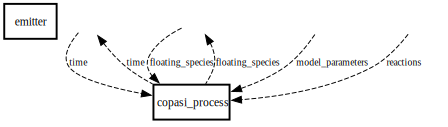

In [14]:
b.visualize()

In [15]:
b.connect_all(append_to_store_name='_store')

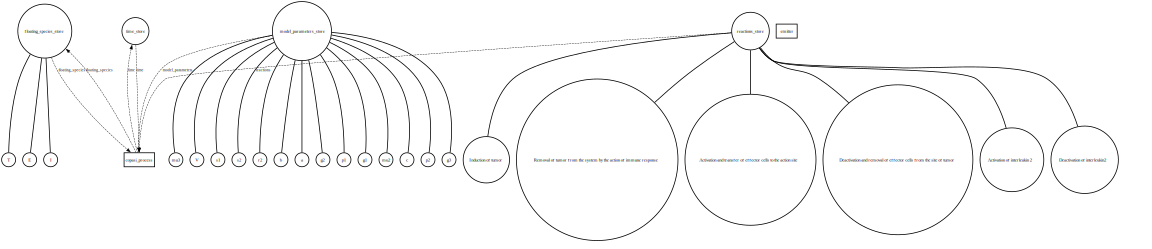

In [16]:
b.visualize()

In [17]:
# b.connect_all()

In [18]:
# b.visualize()

In [19]:
b['emitter'].connect(port='floating_species', target=['copasi_process', 'floating_species']) 

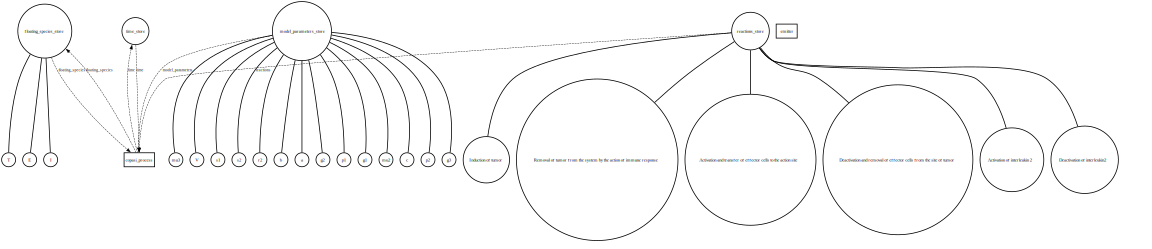

In [20]:
b.visualize()

In [21]:
initial_state = {
    'time': 1.0,
    'floating_species': {'T': 0.25, 'E': 0.456, 'I': 0.0025}
}

b.update(initial_state)

In [22]:
results = b.generate().run(10)

THE FINAL STATE: {'time_store': 10.0, 'floating_species_store': {'T': 0.0, 'E': 0.0, 'I': 0.0}, 'model_parameters_store': {'r2': 0.0, 'b': 0.0, 'a': 0.0, 'g2': 0.0, 'p1': 0.0, 'g1': 0.0, 'mu2': 0.0, 'c': 0.0, 'p2': 0.0, 'g3': 0.0, 'mu3': 0.0, 'V': 0.0, 's1': 0.0, 's2': 0.0}, 'emitter': {'_type': 'step', 'address': 'local:ram-emitter', 'config': {'emit': {}}, 'inputs': {}, 'outputs': {}, 'instance': <biosimulator_processes.process_bigraph.composite.RAMEmitter object at 0x169f2b850>}, 'copasi_process': {'_type': 'process', 'address': 'local:CopasiProcess', 'config': {'model': {'model_id': '', 'model_source': {'value': '../biosimulator_processes/model_files/Caravagna2010.xml'}, 'model_language': 'sbml', 'model_name': 'Unnamed Composite Process TimeCourseModel', 'model_changes': {'species_changes': [{'unit': None, 'initial_concentration': 0.0024, 'initial_particle_number': None, 'initial_expression': None, 'expression': None}, {'unit': None, 'initial_concentration': 0.23, 'initial_particle

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:260: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [23]:
results

In [24]:
from basico import get_species, load_model

get_species(model=load_model(model_filepath))

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
T,compartment,reactions,mmol/ml,1.0,6.022141e+20,,,1.0,6.022141e+20,0.179997,1.083967e+20,Metabolite_3,T
E,compartment,reactions,mmol/ml,1.0,6.022141e+20,,,1.0,6.022141e+20,-0.010000,-6.022137e+18,Metabolite_4,E
I,compartment,reactions,mmol/ml,1.0,6.022141e+20,,,1.0,6.022141e+20,-9.999512,-6.021847e+21,Metabolite_5,I


In [25]:
copasi.model['model_source']

{'value': '../biosimulator_processes/model_files/Caravagna2010.xml'}

In [26]:
copasi.model_dump()

{'model': {'model_id': '',
  'model_source': {'value': '../biosimulator_processes/model_files/Caravagna2010.xml'},
  'model_language': 'sbml',
  'model_name': 'Unnamed Composite Process TimeCourseModel',
  'model_changes': {'species_changes': [{'name': 'T',
     'unit': None,
     'initial_concentration': 0.0024,
     'initial_particle_number': None,
     'initial_expression': None,
     'expression': None},
    {'name': 'E',
     'unit': None,
     'initial_concentration': 0.23,
     'initial_particle_number': None,
     'initial_expression': None,
     'expression': None}],
   'global_parameter_changes': [],
   'reaction_changes': []},
  'model_units': '_default'},
 'method': 'directMethod'}

In [27]:
p = CopasiProcess(
    config={'model': copasi.model}
)

In [28]:
initial_A = p.initial_state()

In [29]:
p.model_changes

{'species_changes': [{'unit': None,
   'initial_concentration': 0.0024,
   'initial_particle_number': None,
   'initial_expression': None,
   'expression': None},
  {'unit': None,
   'initial_concentration': 0.23,
   'initial_particle_number': None,
   'initial_expression': None,
   'expression': None}],
 'global_parameter_changes': [],
 'reaction_changes': []}

In [30]:
unit = get_species('T', model=p.copasi_model_object)[['unit']]

In [31]:
unit.values.tolist()[0][0]

'mmol/ml'

In [32]:
def get_copasi_parameter_type_default(getter, param_name: str, copasi_model_object: object, parameter_type: str) -> Union[str, int, float]:
    """Return the default value of a given model parameter specified by `parameter_type`. 
                
        Args:
            getter:`function`: basico callback with which to query the model. For example: `get_species`.
            param_name:`str`: parameter name to use as an argument in the `getter`. For example, if getter=get_species, this would be a species name.
            copasi_model_object:`CDataModel`: instance in memory which you are querying.
            parameter_type:`str`: which type of parameter you wish to get the default of based on the getter and param_name.
    
        For example:
                
                `get_copasi_parameter_type_default(get_species, 'T', p.copasi_model_object, 'unit')`
    """
    return getter(param_name, model=copasi_model_object)[[parameter_type]].values.tolist()[0][0]

NameError: name 'Union' is not defined

In [ ]:
units = get_copasi_parameter_type_default(get_species, 'T', p.copasi_model_object, 'initial_concentration')

In [ ]:
units

In [ ]:
def get_default_species_unit(species_name: str, copasi_model_object):
    return get_species(species_name, model=copasi_model_object)[['unit']].values.tolist()[0][0]

In [ ]:
from types import NoneType
from typing import * 
from pydantic import Field


class CopasiSpeciesChanges(BaseModel):  # <-- this is done like set_species('B', kwarg=) where the inner most keys are the kwargs
    name: str
    unit: Union[str, NoneType, ModelParameter] = Field(default_factory=get_default_species_unit)
    initial_concentration: Optional[Union[float, ModelParameter]] = None
    initial_particle_number: Optional[Union[float, NoneType, ModelParameter]] = None
    initial_expression: Union[str, NoneType, ModelParameter] = Field(default_factory=get_default_species_unit)
    expression: Union[str, NoneType, ModelParameter] = Field(default='')

In [ ]:
species_changes = CopasiSpeciesChanges(
    name='T',
    initial_concentration=0.023,
    model_object=p.copasi_model_object
)

In [ ]:
species_changes

In [33]:
from typing import Any, List, Type


assert Any == object

AssertionError: 

In [ ]:
# TODO: add copasiprocess config type to CopasiProcess constructor